In [60]:
#IMPORT NECESSARY LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sklearn
warnings.filterwarnings('ignore')

In [61]:
#READ DATA
shared_bike= pd.read_csv("day_bike.csv")

In [62]:
#HAVE LOOK AT DATA
shared_bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [63]:
#To check columns present in dataset
print(shared_bike.columns)

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')


In [64]:
#Get basic idea of data using describe()
shared_bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [65]:
#checking for null values in dataset

count=shared_bike.isnull().sum()
print(count)

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [66]:
#checking for datatypes of columns
shared_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [67]:
#We can see that instant is an index, hence we can drop it. 
shared_bike.drop(['instant'],axis=1,inplace=True)

In [68]:
shared_bike.head(10)

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,06-01-2018,1,0,1,0,4,1,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,07-01-2018,1,0,1,0,5,1,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,08-01-2018,1,0,1,0,6,0,2,6.765000,8.11270,53.5833,17.875868,68,891,959
8,09-01-2018,1,0,1,0,0,0,1,5.671653,5.80875,43.4167,24.250650,54,768,822
9,10-01-2018,1,0,1,0,1,1,1,6.184153,7.54440,48.2917,14.958889,41,1280,1321


In [69]:
#we can see column dteday and yr month are having same data so we can drop dteday to avoid confusion

shared_bike.drop(['dteday'],axis=1,inplace=True)
shared_bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [70]:
#We know that casual+registered=cnt and cnt is our target variable so we will not consider casual and registered
shared_bike.drop(['casual','registered'],axis=1,inplace=True)
shared_bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [71]:
#check for datatypes
shared_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


- From data we can see that: season,yr,mnth,holiday,weekday,workingday,weathersit all are categorical variables
- We will replace season,weekday and weathersit with appropriate values

In [72]:
shared_bike['season'].replace({1:"spring",2:"summer",3:"fall",4:"winter"},inplace=True)
shared_bike.head(10)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600
5,spring,0,1,0,4,1,1,8.378268,11.66045,51.8261,6.000868,1606
6,spring,0,1,0,5,1,2,8.057402,10.44195,49.8696,11.304642,1510
7,spring,0,1,0,6,0,2,6.765000,8.11270,53.5833,17.875868,959
8,spring,0,1,0,0,0,1,5.671653,5.80875,43.4167,24.250650,822
9,spring,0,1,0,1,1,1,6.184153,7.54440,48.2917,14.958889,1321


In [73]:
shared_bike['weathersit'].replace({1:"Clear_sky",2:"hot_humid",3:"Light_rains",4:"chilly_flakes"},inplace=True)
shared_bike.head(10)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,6,0,hot_humid,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,0,0,hot_humid,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,1,1,Clear_sky,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,2,1,Clear_sky,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,3,1,Clear_sky,9.305237,11.46350,43.6957,12.522300,1600
5,spring,0,1,0,4,1,Clear_sky,8.378268,11.66045,51.8261,6.000868,1606
6,spring,0,1,0,5,1,hot_humid,8.057402,10.44195,49.8696,11.304642,1510
7,spring,0,1,0,6,0,hot_humid,6.765000,8.11270,53.5833,17.875868,959
8,spring,0,1,0,0,0,Clear_sky,5.671653,5.80875,43.4167,24.250650,822
9,spring,0,1,0,1,1,Clear_sky,6.184153,7.54440,48.2917,14.958889,1321


In [74]:
shared_bike['weekday'].replace({0:"Sunday",1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thursday",5:"Friday",6:"Saturday"},inplace=True)
shared_bike.head(10)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,Saturday,0,hot_humid,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,Sunday,0,hot_humid,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,Monday,1,Clear_sky,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,Tuesday,1,Clear_sky,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,Wednesday,1,Clear_sky,9.305237,11.46350,43.6957,12.522300,1600
5,spring,0,1,0,Thursday,1,Clear_sky,8.378268,11.66045,51.8261,6.000868,1606
6,spring,0,1,0,Friday,1,hot_humid,8.057402,10.44195,49.8696,11.304642,1510
7,spring,0,1,0,Saturday,0,hot_humid,6.765000,8.11270,53.5833,17.875868,959
8,spring,0,1,0,Sunday,0,Clear_sky,5.671653,5.80875,43.4167,24.250650,822
9,spring,0,1,0,Monday,1,Clear_sky,6.184153,7.54440,48.2917,14.958889,1321


In [75]:
shared_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(5), object(3)
memory usage: 68.6+ KB


### EDA
#### PAIRPLOTS TO UNDERSTAND NUMERICAL VARIABLES

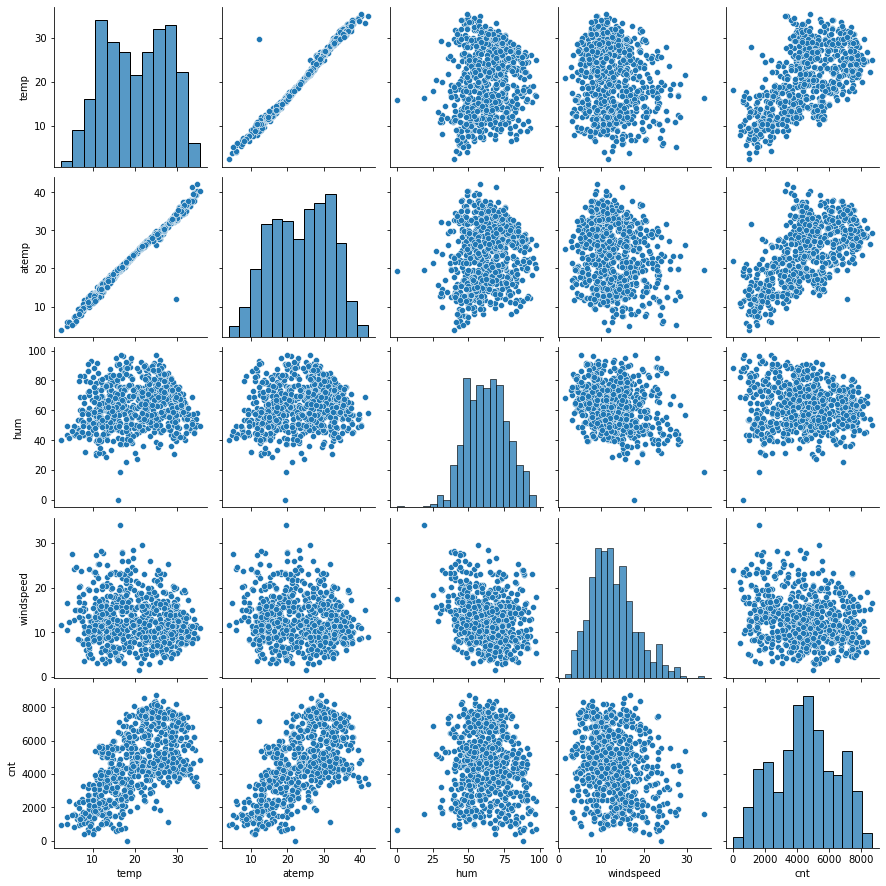

In [76]:
sns.pairplot(shared_bike, vars=['temp','atemp','hum','windspeed',"cnt"])
plt.show()

#### We can see that there are some independent variables look positively correlated to the 'count' variable.

- Bike rentals are more correlated to temperature

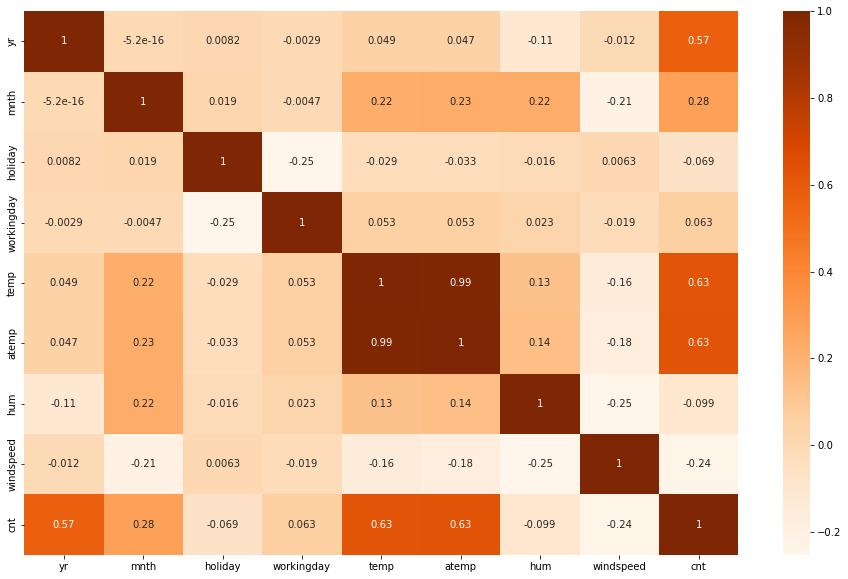

In [77]:
# We can easily say from above graphs that temp and atemp have a relationship
#Now lets check the correlation using this heatmap
plt.figure(figsize = (16, 10))
sns.heatmap(shared_bike.corr(), annot = True, cmap="Oranges")
plt.show()

Inference: correlation between temp and atemp is 0.99 which is almost 1 which is highly correlated. 

In [78]:
#correlation between temp and atemp is 0.99 which is almost 1
#Let us drop temp and consider atemp

shared_bike.drop(['temp'],axis=1,inplace=True)
shared_bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,spring,0,1,0,Saturday,0,hot_humid,18.18125,80.5833,10.749882,985
1,spring,0,1,0,Sunday,0,hot_humid,17.68695,69.6087,16.652113,801
2,spring,0,1,0,Monday,1,Clear_sky,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,Tuesday,1,Clear_sky,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,Wednesday,1,Clear_sky,11.46350,43.6957,12.522300,1600


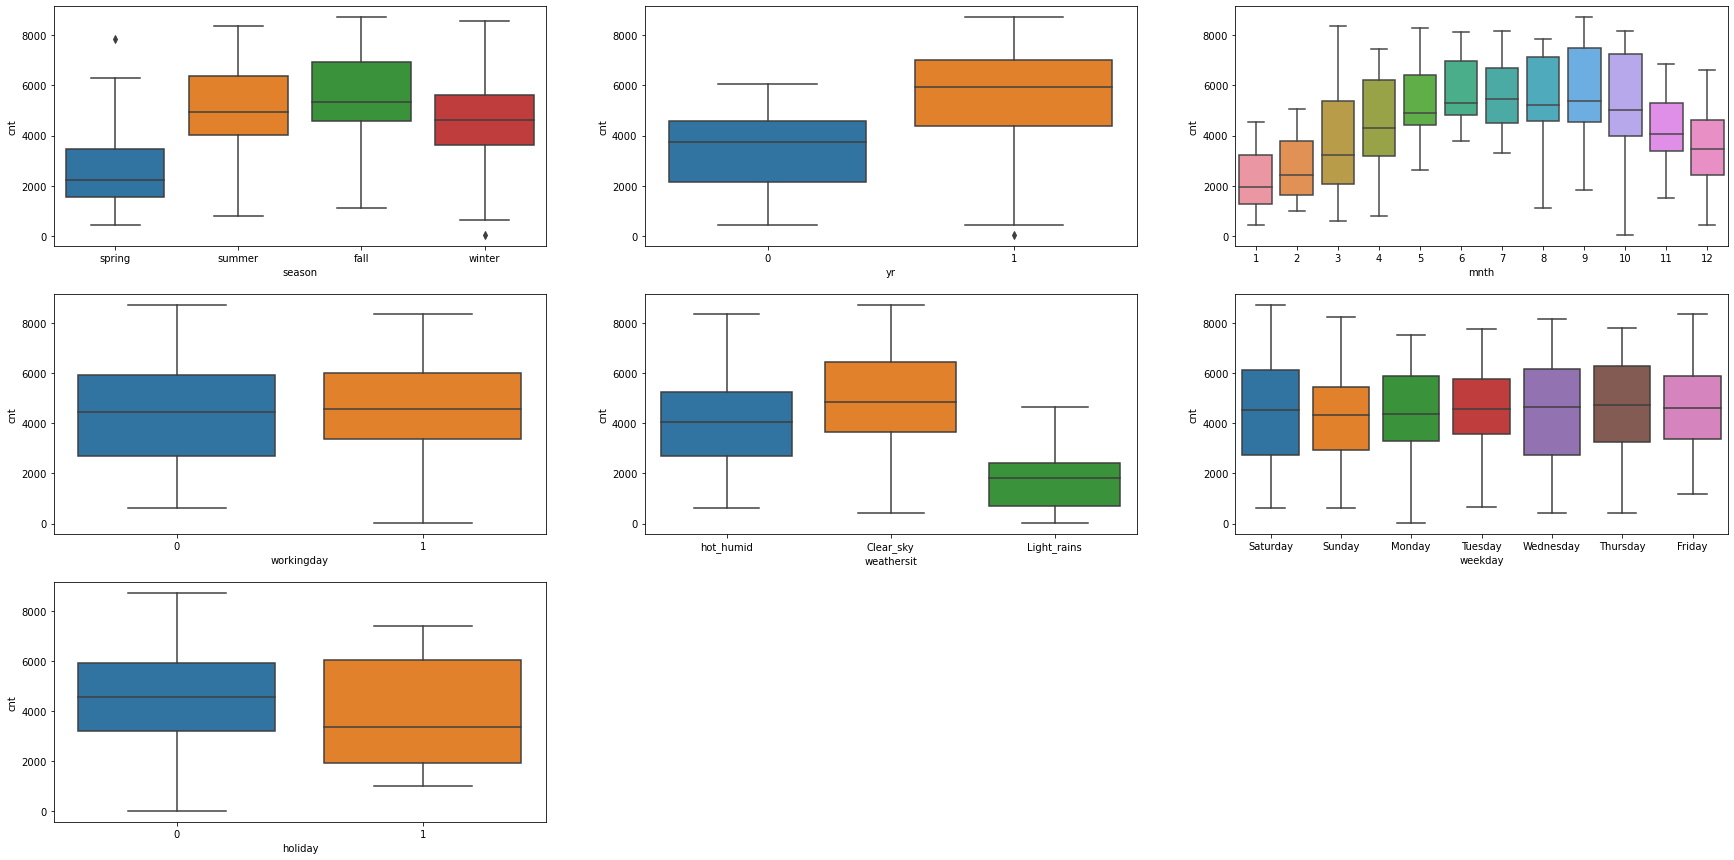

In [79]:
#Visualising categorical Variables to understand data better
plt.figure(figsize=(30, 15))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = shared_bike)#yr','mnth','workingday','weathersit','weekday'
plt.subplot(3,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = shared_bike)
plt.subplot(3,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = shared_bike)
plt.subplot(3,3,4)
sns.boxplot(x = 'workingday', y = 'cnt', data = shared_bike)
plt.subplot(3,3,5)
sns.boxplot(x = 'weathersit', y = 'cnt', data = shared_bike)
plt.subplot(3,3,6)
sns.boxplot(x = 'weekday', y = 'cnt', data = shared_bike)
plt.subplot(3,3,7)
sns.boxplot(x = 'holiday', y = 'cnt', data = shared_bike)
plt.show()


## Here many insights can be drawn from the plots

##1. Season: 3:fall has highest demand for rental bikes
##2. I see that demand for next year has grown
##3. Demand is continuously growing each month till June. September month has highest demand. After September, demand is        decreasing
##4. When there is a holiday, demand has decreased.
##5. On saturday, wednesday and thursday demand is more. 
##6. The clear weather has highest demand.
##7. During September, bike sharing is more. During the year end and beginning, it is less, could be due to extereme weather conditions.

### UNIVARITE ANALYSIS

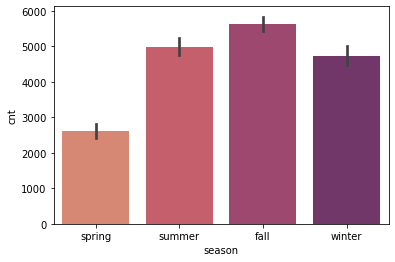

In [80]:
#1: Season

#Relation between season and count of bike rentals
sns.barplot('season','cnt',data=shared_bike,palette="flare",)
plt.show()

- Inference: Bike Rentals are more during the Fall season and then in summer and less in Spring season

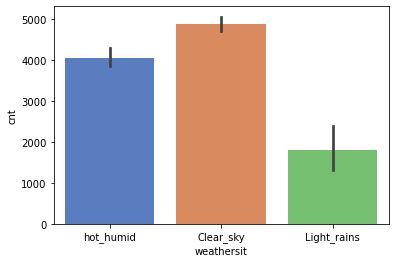

In [81]:
#2: Weathersit

#Relation between weather and count of bike rentals
sns.barplot('weathersit','cnt',palette="muted",data=shared_bike)
plt.show()

- Inference: Bike Rentals are more in partly cloudy weather and less in Light snow

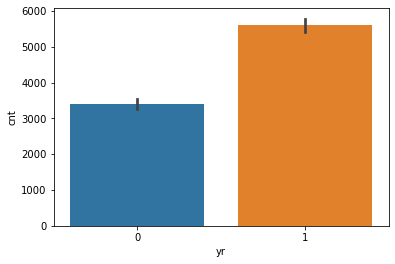

In [82]:
#3: 
#year (0: 2018, 1:2019)
#Relation between Year and count of bike rentals
sns.barplot('yr','cnt',data=shared_bike)
plt.show()

Inference:  Bike rentals are more in the year 2019 compared to 2018

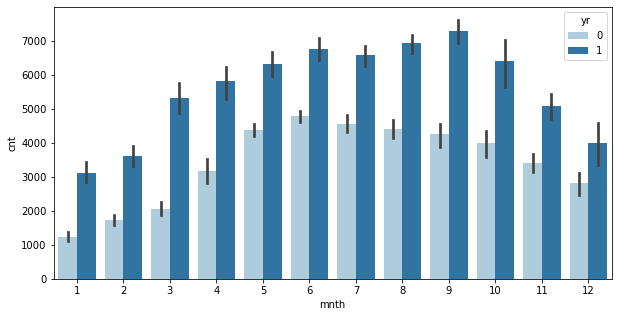

In [83]:
#4: 
#Relation between month and count
plt.figure(figsize=(10,5))
sns.barplot('mnth','cnt',hue='yr',data=shared_bike,palette='Paired')
plt.show()

- Bike Rentals are more in the every month of the year 2019 compared to 2018

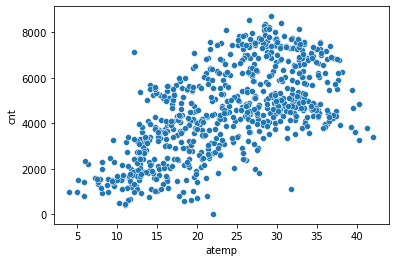

In [84]:
#5: Temperature
#scatter plot for atemperature to count
sns.scatterplot(x='atemp',y='cnt' ,data=shared_bike)
plt.show()

- High chances bike Rentals are observed at higher temperatures

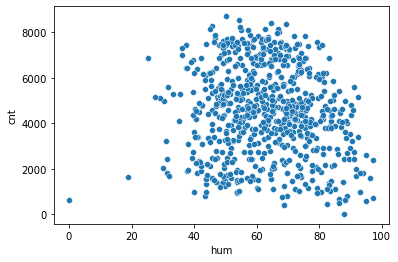

In [85]:
#6: Humidity
sns.scatterplot(x='hum', y='cnt',data=shared_bike)
plt.show()

- Bike rentals more at high humidity

### Creating dummy variables

In [86]:
#Convert variables to object type
shared_bike['mnth']=shared_bike['mnth'].astype(object)
shared_bike['season']=shared_bike['season'].astype(object)
shared_bike['weathersit']=shared_bike['weathersit'].astype(object)
shared_bike['weekday']=shared_bike['weekday'].astype(object)
shared_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   atemp       730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 62.9+ KB


In [87]:
#We are creating DUMMY VARIABLES for CATEGORICAL DATA 

Season_cond=pd.get_dummies(shared_bike['season'],drop_first=True)
Weather_cond=pd.get_dummies(shared_bike['weathersit'],drop_first=True)
weekday_cond=pd.get_dummies(shared_bike['weekday'],drop_first=True)
Month_cond=pd.get_dummies(shared_bike['mnth'],drop_first=True)

In [88]:
shared_bike=pd.concat([shared_bike,Season_cond],axis=1)
shared_bike=pd.concat([shared_bike,Weather_cond],axis=1)
shared_bike=pd.concat([shared_bike,weekday_cond],axis=1)
shared_bike=pd.concat([shared_bike,Month_cond],axis=1)
shared_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 33 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   season       730 non-null    object 
 1   yr           730 non-null    int64  
 2   mnth         730 non-null    object 
 3   holiday      730 non-null    int64  
 4   weekday      730 non-null    object 
 5   workingday   730 non-null    int64  
 6   weathersit   730 non-null    object 
 7   atemp        730 non-null    float64
 8   hum          730 non-null    float64
 9   windspeed    730 non-null    float64
 10  cnt          730 non-null    int64  
 11  spring       730 non-null    uint8  
 12  summer       730 non-null    uint8  
 13  winter       730 non-null    uint8  
 14  Light_rains  730 non-null    uint8  
 15  hot_humid    730 non-null    uint8  
 16  Monday       730 non-null    uint8  
 17  Saturday     730 non-null    uint8  
 18  Sunday       730 non-null    uint8  
 19  Thursday

In [108]:
#Deleting the orginal columns season.weathersit,weekday,mnth
shared_bike.drop(['season','weekday','mnth','weathersit'],axis=1,inplace=True)

shared_bike.column


KeyError: "['season', 'weekday', 'mnth', 'weathersit'] not found in axis"

In [90]:
#Now the data we have is ready to split
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
shared_train, shared_test = train_test_split(shared_bike, train_size = 0.7, test_size = 0.3, random_state = 100)

In [91]:
shared_train.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,...,3,4,5,6,7,8,9,10,11,12
653,winter,1,10,0,Tuesday,1,Clear_sky,23.0423,55.8333,12.208807,...,0,0,0,0,0,0,0,1,0,0
576,fall,1,7,0,Tuesday,1,Clear_sky,33.1448,70.4167,11.083475,...,0,0,0,0,1,0,0,0,0,0
426,spring,1,3,0,Saturday,0,hot_humid,20.6746,62.1250,10.792293,...,1,0,0,0,0,0,0,0,0,0
728,spring,1,12,0,Sunday,0,Clear_sky,11.5850,48.3333,23.500518,...,0,0,0,0,0,0,0,0,0,1
482,summer,1,4,0,Saturday,0,hot_humid,18.8752,48.9583,8.708325,...,0,1,0,0,0,0,0,0,0,0


In [92]:
shared_test.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,...,3,4,5,6,7,8,9,10,11,12
184,fall,0,7,1,Monday,0,hot_humid,33.27085,63.7917,5.459106,...,0,0,0,0,1,0,0,0,0,0
535,summer,1,6,0,Wednesday,1,Clear_sky,36.04875,59.2083,7.625404,...,0,0,0,1,0,0,0,0,0,0
299,winter,0,10,0,Thursday,1,hot_humid,22.85230,81.2917,13.250121,...,0,0,0,0,0,0,0,1,0,0
221,fall,0,8,0,Wednesday,1,Clear_sky,34.24915,42.4167,13.417286,...,0,0,0,0,0,1,0,0,0,0
152,summer,0,6,0,Thursday,1,Clear_sky,32.19710,30.5000,19.583229,...,0,0,0,1,0,0,0,0,0,0


In [105]:
shared_train.columns

Index([     'season',          'yr',        'mnth',     'holiday',
           'weekday',  'workingday',  'weathersit',       'atemp',
               'hum',   'windspeed',         'cnt',      'spring',
            'summer',      'winter', 'Light_rains',   'hot_humid',
            'Monday',    'Saturday',      'Sunday',    'Thursday',
           'Tuesday',   'Wednesday',             2,             3,
                   4,             5,             6,             7,
                   8,             9,            10,            11,
                  12],
      dtype='object')

In [94]:
#SCALING THE NUMERICAL DATA
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [95]:
num_vars=['atemp','hum','windspeed','cnt']
shared_train[num_vars] = scaler.fit_transform(shared_train[num_vars])

In [96]:
shared_train.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,...,3,4,5,6,7,8,9,10,11,12
653,winter,1,10,0,Tuesday,1,Clear_sky,0.501133,0.575354,0.300794,...,0,0,0,0,0,0,0,1,0,0
576,fall,1,7,0,Tuesday,1,Clear_sky,0.766351,0.725633,0.264686,...,0,0,0,0,1,0,0,0,0,0
426,spring,1,3,0,Saturday,0,hot_humid,0.438975,0.640189,0.255342,...,1,0,0,0,0,0,0,0,0,0
728,spring,1,12,0,Sunday,0,Clear_sky,0.200348,0.498067,0.663106,...,0,0,0,0,0,0,0,0,0,1
482,summer,1,4,0,Saturday,0,hot_humid,0.391735,0.504508,0.188475,...,0,1,0,0,0,0,0,0,0,0


In [97]:
shared_train.describe()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,3,4,5,6,7,8,9,10,11,12
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,...,0.098039,0.078431,0.084314,0.074510,0.076471,0.096078,0.080392,0.086275,0.086275,0.084314
std,0.500429,0.157763,0.468282,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,...,0.297660,0.269113,0.278131,0.262857,0.266010,0.294988,0.272166,0.281045,0.281045,0.278131
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [98]:
#CREATING X AND Y
y_train = shared_train.cnt
X_train = shared_train.drop(['cnt'],axis=1)

In [99]:
X_train.columns

Index([     'season',          'yr',        'mnth',     'holiday',
           'weekday',  'workingday',  'weathersit',       'atemp',
               'hum',   'windspeed',      'spring',      'summer',
            'winter', 'Light_rains',   'hot_humid',      'Monday',
          'Saturday',      'Sunday',    'Thursday',     'Tuesday',
         'Wednesday',             2,             3,             4,
                   5,             6,             7,             8,
                   9,            10,            11,            12],
      dtype='object')

In [100]:
y_train.head()

653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
Name: cnt, dtype: float64

In [101]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

#### USING RFE APPROACH FOR FEATURE SELECTION
#### WE START WITH 15 VARS AND WILL USE MIXED APPROACH TO BUILD A MODEL

In [107]:
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm,n_features_to_select=15)            
rfe = rfe.fit(X_train, y_train)

ValueError: could not convert string to float: 'winter'

In [ ]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

In [ ]:
col = X_train.columns[rfe.support_]
col

In [ ]:
X_train.columns[~rfe.support_]

In [ ]:
X_train_rfe = X_train[col]

### BUILDING MODEL USING STATSMODEL:

In [ ]:
import statsmodels.api as sm  
X_train_rfe1 = sm.add_constant(X_train_rfe)

In [ ]:
lm = sm.OLS(y_train,X_train_rfe1).fit()

In [ ]:
print(lm.summary())

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

In [ ]:
X_train_rfe1.head()

In [ ]:
X_train_rfe=X_train_rfe.drop(['workingday'],axis=1) # COLUMN workngday HAS A VERY HIGH VIF SO WE DROP IT 

In [ ]:
X_train_rfe.columns


In [ ]:
import statsmodels.api as sm  
X_train_rfe1 = sm.add_constant(X_train_rfe)

In [ ]:
lm1 = sm.OLS(y_train,X_train_rfe1).fit()

In [ ]:
print(lm1.summary())

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

In [ ]:
X_train_rfe=X_train_rfe.drop(['hum'],axis=1) #COLUMN humidity HAS A VERY HIGH VIF SO WE DROP IT

In [ ]:
X_train_rfe2 = sm.add_constant(X_train_rfe)
lm2 = sm.OLS(y_train,X_train_rfe2).fit()
print(lm2.summary())

In [ ]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

In [ ]:
X_train_rfe.columns

In [ ]:
X_train_rfe=X_train_rfe.drop(['windspeed'],axis=1) #windspeed has high VIF >2 so we drop it

In [ ]:
X_train_rfe3 = sm.add_constant(X_train_rfe)
lm3 = sm.OLS(y_train,X_train_rfe3).fit()
print(lm3.summary())

In [ ]:
X_train_rfe3=X_train_rfe3.drop(['Saturday',4],axis=1) #Saturday ,4 has A VERY HIGH p-value WHUCH MEANS IT IS insignificant SO WE DROP IT

In [ ]:
X_train_rfe3.columns

In [ ]:
X_train_rfe4 = sm.add_constant(X_train_rfe3)
lm4 = sm.OLS(y_train,X_train_rfe4).fit()
print(lm4.summary())

NOTE- We have considered all columns and checked. Now we stop the model building and check on which model can we choose

- Out all the models model Linear Regression Model (lm4) seems to give good result so we choose it.


Note - From the above histogram, we could see that the Residuals are normally distributed. Hence our assumption for Linear Regression is valid.

In [ ]:
#CHECKING COLOMNS
X_train_rfe4.columns

In [ ]:
print(X_train_rfe4.shape)


In [ ]:
#PREDICT VALUES
y_train_cnt = lm4.predict(X_train_rfe4)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
#CALCULATING RESIDUALS
res=y_train - y_train_cnt

In [ ]:
#Checking ASSUMPTION OF NORMALITY:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)  # Plot heading 
plt.xlabel('Errors', fontsize = 18)  # X-label

Note - From the above histogram, we could see that the Residuals are normally distributed. Hence our assumption for Linear Regression is valid.

In [ ]:
#CHECKING COLOMNS
X_train_rfe4.columns

In [ ]:
print(X_train_rfe4.shape)
print(res.shape)

In [ ]:
#SCALING THE NUMERICAL DATA
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [110]:
#SCALING THE TEST DATA 
num_vars=['atemp','hum','windspeed']
shared_test[num_vars] = scaler.fit_transform(shared_test[num_vars])

In [ ]:
#Creating x and y sets
y_test = shared_test.pop('cnt')
X_test = shared_test

In [ ]:
X_train_new=X_train_rfe4.drop(['const'], axis=1)

In [ ]:
# Now let's use our model to make predictions.
# Creating X_test_new dataframe by dropping variables from X_test

X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [ ]:
X_train_rfe4.columns

In [111]:
#Making predictions on the chosen model
y_pred = lm4.predict(X_test_new)

NameError: name 'lm4' is not defined

In [109]:
#CHECKING PREDICTED V/s TEST DATA 

fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)  # Plot heading 
plt.xlabel('y_test', fontsize=18)  # X-label
plt.ylabel('y_pred', fontsize=16) # Y-label

NameError: name 'y_test' is not defined

<Figure size 432x288 with 0 Axes>

NOTE- We have a model that seems good enough to predict demand of bikes. The actual and predicted cnt i.e demand significantly overlapped, thus indicating that the model is able to explain the change in demand very well.

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [ ]:
#Returns the mean squared error; we'll take a square root
np.sqrt(mean_squared_error(y_test, y_pred))

In [ ]:
#Calculate the r square for test
r_squared = r2_score(y_test, y_pred)
r_squared

NOTE- R square of our model is 0.825

In [ ]:
X_t=X_train_new.iloc[:,0].values

In [ ]:
#PLotting the residuals to see if a pattern exists
#Checking assumption of homoscedasticity and autocorrelation
plt.figure()
plt.scatter(X_t,res)
fig.suptitle('Independent vars vs res', fontsize=20)   # Plot heading 
plt.xlabel('Independent variables', fontsize=18)     # X-label
plt.ylabel('Residuals', fontsize=16)  
plt.show()

NOTE- When we have time series data (e.g. yearly data), then the regression is likely to suffer from autocorrelation because demand next year will certainly be dependent on demand this year. Hence, error terms in different observations will surely be correlated with each other.

In [ ]:
X_train_new.head()

In [ ]:
print(X_train_rfe4.columns)
print(lm4.summary())

### We can see that the equation for best fitted line is:
- cnt(Count)= 0.235 X yr - 0.1032 X holiday+ 0.4525 X temp - 0.1101 X spring + 0.0585 X winter - 0.2997 X Light_rains - 0.0819 X hot_humid -0.0501 X Sunday + 0.0384 X 5 +0.0813 X 9 

#### We can see the demand for bikes depends mainly on below variables:
- year , holiday ,temp, Spring, winter, Light_rains,hot_humid ,Sunday, 5(May),9(Sep)

- Demands increases in the month of 3(May), 9(September) , winter season.

- Demand decreases if it is holiday , Spring, Light rain,hot_humid, Sunday
### Final recommendations for the company:

- Demand is higher in month of 3(May), 9(September),winter season.